# Análisis basado en eventos.
## Introducción

Este proyecto se centra en el análisis del comportamiento del usuario en una aplicación móvil de venta de productos alimenticios, con el objetivo de optimizar la experiencia del usuario y aumentar las tasas de conversión. A través de un análisis exhaustivo de los registros de eventos de los usuarios, exploraremos el embudo de ventas, identificaremos los puntos de fricción y evaluaremos el impacto de un rediseño de la interfaz de usuario mediante pruebas A/B.

Contexto del Proyecto:

Trabajamos en una empresa emergente que busca mejorar continuamente su aplicación móvil para ofrecer la mejor experiencia posible a sus usuarios. Para ello, es fundamental comprender cómo interactúan los usuarios con la aplicación, desde la primera interacción hasta la realización de una compra. Este análisis nos permitirá identificar áreas de mejora y tomar decisiones basadas en datos para optimizar la aplicación.

Objetivos Principales:

- Análisis del Embudo de Ventas: Investigar cómo los usuarios navegan a través de la aplicación, identificando las etapas del embudo de ventas y calculando las tasas de conversión en cada etapa.
- Identificación de Puntos de Fricción: Determinar en qué etapas del embudo se produce la mayor pérdida de usuarios, con el fin de identificar posibles problemas en la interfaz de usuario o en el flujo de la aplicación.
- Evaluación del Rediseño de la Interfaz: Realizar un análisis A/B para evaluar el impacto del cambio de fuentes en la interfaz de usuario, comparando el comportamiento de los usuarios en la versión original y la versión rediseñada.
- Toma de Decisiones Basadas en Datos: Utilizar los resultados del análisis para tomar decisiones informadas sobre la optimización de la aplicación y la mejora de la experiencia del usuario.

## Abrir el archivo de datos y leer la información general.
### Se cargan las bibliotecas necesarias y los datos desde el archivo CSV.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [3]:
logs = pd.read_csv('D:/TripleTen/logs_exp_us.csv', sep='\t')

### Se examina la información básica del DataFrame lo que nos muestra el tipo de datos de cada columna y las primeras filas.

In [ ]:
# Se muestran las primeras filas
print("Primeras filas del dataset:")
print(logs.head())

Primeras filas del dataset:
                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248


In [5]:
# Mostrar información general
print("\nInformación general del dataset:")
display(logs.info())


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

## Preparar los datos para el análisis.

In [6]:
# Cambiar el nombre de las columnas
logs.columns = ['name', 'user_id', 'time', 'experiment']

In [7]:
# Cambiar los tipos de datos de 'event_datetime' y 'event_date' a datetime, y 'experiment' a category
logs['date_time'] = pd.to_datetime(logs['time'], unit='s')
logs['experiment'] = logs['experiment'].astype('category')
logs['date'] = logs['date_time'].dt.date
logs['date'] = pd.to_datetime(logs['date'])

In [8]:
# Comprobar valores ausentes y tipos de datos
print("\nValores ausentes:")
print(logs.isnull().sum())


Valores ausentes:
name          0
user_id       0
time          0
experiment    0
date_time     0
date          0
dtype: int64


In [9]:
print("\nTipos de datos:")
print(logs.dtypes)


Tipos de datos:
name                  object
user_id                int64
time                   int64
experiment          category
date_time     datetime64[ns]
date          datetime64[ns]
dtype: object


In [10]:
# Mostrar las primeras filas para verificar los cambios
print("\nPrimeras filas con cambios:")
print(logs.head())


Primeras filas con cambios:
                      name              user_id        time experiment  \
0         MainScreenAppear  4575588528974610257  1564029816        246   
1         MainScreenAppear  7416695313311560658  1564053102        246   
2  PaymentScreenSuccessful  3518123091307005509  1564054127        248   
3         CartScreenAppear  3518123091307005509  1564054127        248   
4  PaymentScreenSuccessful  6217807653094995999  1564055322        248   

            date_time       date  
0 2019-07-25 04:43:36 2019-07-25  
1 2019-07-25 11:11:42 2019-07-25  
2 2019-07-25 11:28:47 2019-07-25  
3 2019-07-25 11:28:47 2019-07-25  
4 2019-07-25 11:48:42 2019-07-25  


- Se renombraron las columnas para mayor claridad y facilidad de uso, lo que facilita la referencia a ellas en el análisis posterior.

- Se convirtió la columna time a un formato de fecha y hora (datetime64[ns]) para permitir un análisis temporal preciso. 
Además, se convirtió la columna experiment a tipo category para optimizar el uso de memoria y mejorar la eficiencia del análisis.

- Se extrajo la fecha y la hora de la columna date_time para crear dos nuevas columnas: date_time (que contiene la información completa de fecha y hora) y date (que solo contiene la fecha). Esto facilita la realización de análisis por fecha o por hora, según sea necesario.

- Se comprobó si había valores ausentes en el conjunto de datos, y se encontró que no había ninguno. Esto indica que el conjunto de datos está completo en términos de valores, lo que reduce la necesidad de realizar imputaciones o eliminaciones de datos.

Los datos se han preparado correctamente para el análisis. Se han realizado las conversiones de tipos de datos necesarias, se han agregado columnas relevantes y se ha verificado la ausencia de valores ausentes. El conjunto de datos está ahora listo para el análisis exploratorio y las pruebas estadísticas en los pasos posteriores.

In [11]:
# 1. ¿Cuántos eventos hay en los registros?
print("Eventos únicos:", logs['name'].nunique())

Eventos únicos: 5


### ¿Cuántos usuarios hay en los registros?

In [12]:
# 2. ¿Cuántos usuarios hay en los registros?
print("Usuarios únicos:", logs['user_id'].nunique())

Usuarios únicos: 7551


### ¿Cuál es el promedio de eventos por usuario?

In [13]:
# 3. ¿Cuál es el promedio de eventos por usuario?
print("Promedio de eventos por usuario:", logs.groupby('user_id')['name'].count().mean())

Promedio de eventos por usuario: 32.33028737915508


### ¿Qué periodo de tiempo cubren los datos?

In [14]:
print(logs['date_time'].describe())

count                           244126
mean     2019-08-04 10:18:35.842716160
min                2019-07-25 04:43:36
25%      2019-08-02 14:36:20.249999872
50%                2019-08-04 11:49:55
75%                2019-08-06 06:55:11
max                2019-08-07 21:15:17
Name: date_time, dtype: object


In [15]:
# 4. ¿Qué periodo de tiempo cubren los datos?
fecha_minima = logs['date_time'].min()
fecha_maxima = logs['date_time'].max()
print(f"Periodo de tiempo: {fecha_minima} a {fecha_maxima}")

Periodo de tiempo: 2019-07-25 04:43:36 a 2019-08-07 21:15:17


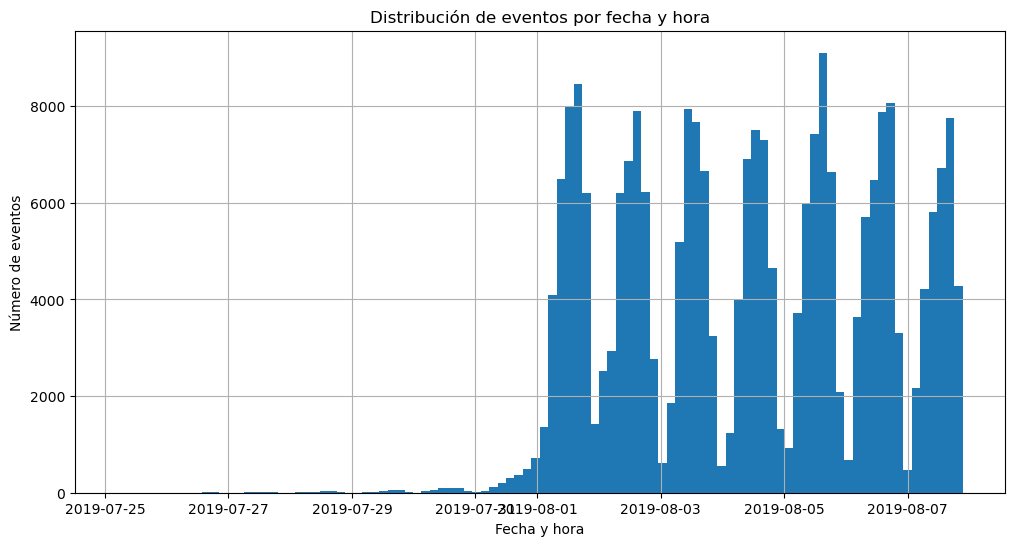

In [16]:
# Histograma por fecha y hora
plt.figure(figsize=(12, 6))
logs['date_time'].hist(bins=100)
plt.title('Distribución de eventos por fecha y hora')
plt.xlabel('Fecha y hora')
plt.ylabel('Número de eventos')
plt.show()

Se observa un cambio dramático en el volumen de eventos alrededor del 1 de agosto de 2019. Antes de esta fecha, el número de eventos es muy bajo, casi insignificante. Después del 1 de agosto, hay un aumento masivo y constante en la actividad. Después del 1 de agosto, se percibe un patrón diario claro en el número de eventos, con picos y valles regulares. Esto sugiere que la actividad de los usuarios varía a lo largo del día.

In [17]:
# Encontrar el momento en que los datos comienzan a estar completos (umbral visual)
logs_filtrados = logs[logs['date'] >= '2019-08-01'].copy()
print("Filas después de filtrar:", logs_filtrados.shape[0])

Filas después de filtrar: 241298


In [18]:
print(logs_filtrados.groupby('experiment')['user_id'].nunique())

experiment
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_13024\3552680146.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(logs_filtrados.groupby('experiment')['user_id'].nunique())


### ¿Qué periodo representan realmente los datos?

In [19]:
print(f"Periodo real de los datos: {logs_filtrados['date'].min()} a {logs_filtrados['date'].max()}")

Periodo real de los datos: 2019-08-01 00:00:00 a 2019-08-07 00:00:00


### ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?

In [20]:
# 5. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos?
eventos_antes = logs.shape[0]
eventos_despues = logs_filtrados.shape[0]
usuarios_antes = logs['user_id'].nunique()
usuarios_despues = logs_filtrados['user_id'].nunique()
print(f"Eventos perdidos: {eventos_antes - eventos_despues}")
print(f"Usuarios perdidos: {usuarios_antes - usuarios_despues}")

Eventos perdidos: 2828
Usuarios perdidos: 17


### Asegurar que se tienen usuarios de los tres grupos experimentales.

In [21]:
# 6. Asegúrate de tener usuarios de los tres grupos experimentales.
print(logs_filtrados.groupby('experiment')['user_id'].nunique())

experiment
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


C:\Users\adria\AppData\Local\Temp\ipykernel_13024\3215548228.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(logs_filtrados.groupby('experiment')['user_id'].nunique())


C:\Users\adria\AppData\Local\Temp\ipykernel_13024\428145831.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usuarios_por_grupo = logs.groupby('experiment')['user_id'].nunique()


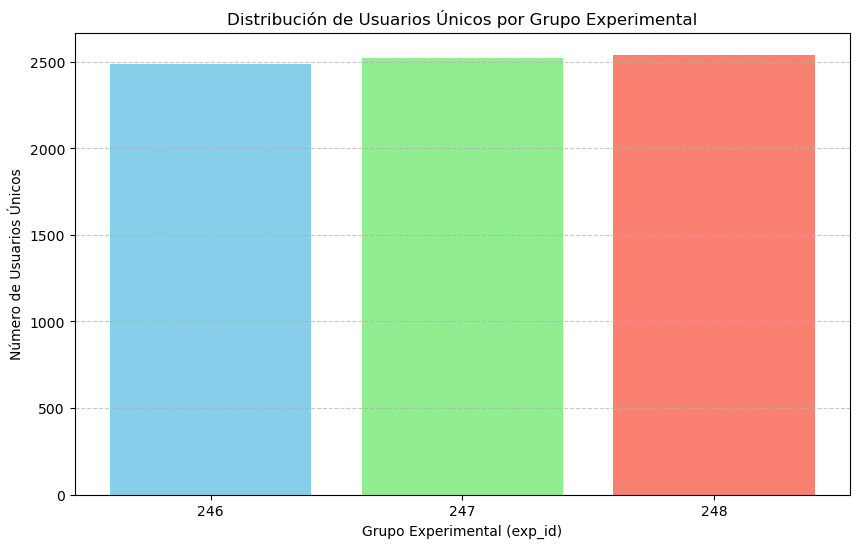

In [22]:
usuarios_por_grupo = logs.groupby('experiment')['user_id'].nunique()

plt.figure(figsize=(10, 6))
plt.bar(usuarios_por_grupo.index, usuarios_por_grupo.values, color=['skyblue', 'lightgreen', 'salmon'])

plt.xlabel('Grupo Experimental (exp_id)')
plt.ylabel('Número de Usuarios Únicos')
plt.title('Distribución de Usuarios Únicos por Grupo Experimental')

plt.xticks(usuarios_por_grupo.index) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

Se observa que el número de usuarios únicos en cada uno de los tres grupos experimentales (246, 247, y 248) es muy similar. Las barras tienen alturas casi idénticas.

- Hay 5 tipos de eventos únicos en el conjunto de datos.
- Hay 7551 usuarios únicos en el conjunto de datos original.
- Cada usuario realiza un promedio de 32.33 eventos.
- Los datos cubren desde el 25 de julio de 2019 hasta el 7 de agosto de 2019.
- El histograma muestra un aumento dramático en la actividad a partir del primero de agosto del 2019. Por lo cual, es prudente filtrar la data para obtener una información mas precisa sobre el comportamiento de los usuarios.
- Después de filtrar los datos para incluir solo las fechas a partir del 1 de agosto de 2019, quedan 241,298 filas.
- Los tres grupos experimentales (246, 247, 248) tienen una cantidad similar de usuarios, lo que indica una distribución uniforme.
- El período de tiempo real después del filtrado es del 1 de agosto de 2019 al 7 de agosto de 2019.
- Se perdieron 2,828 eventos y 17 usuarios al filtrar los datos.


El conjunto de datos contiene información sobre 5 eventos distintos y 7,551 usuarios únicos.
La actividad de los usuarios aumentó significativamente a partir del 1 de agosto de 2019. Esta observación justifica la decisión de filtrar los datos para centrarse en el período de mayor actividad, además de que la data anterior al primero de agosto puede no ser confiable.

Al filtrar los datos, se eliminó una pequeña cantidad de eventos y usuarios. Sin embargo, esta pérdida es insignificante en comparación con el tamaño total del conjunto de datos y no debería afectar significativamente los resultados del análisis.
La distribución uniforme de usuarios entre los grupos experimentales es crucial para garantizar la validez de las pruebas A/A/B.

## Estudiar el embudo de eventos.

In [23]:
print("Eventos únicos:", logs_filtrados['name'].unique())
print(logs_filtrados['name'].value_counts())
print(logs_filtrados.groupby('name')['user_id'].nunique().sort_values(ascending=False))

Eventos únicos: ['Tutorial' 'MainScreenAppear' 'OffersScreenAppear' 'CartScreenAppear'
 'PaymentScreenSuccessful']
name
MainScreenAppear           117431
OffersScreenAppear          46350
CartScreenAppear            42365
PaymentScreenSuccessful     34113
Tutorial                     1039
Name: count, dtype: int64
name
MainScreenAppear           7419
OffersScreenAppear         4593
CartScreenAppear           3734
PaymentScreenSuccessful    3539
Tutorial                    840
Name: user_id, dtype: int64


In [24]:
all_users = logs_filtrados['user_id'].nunique()
main_screen_users = logs_filtrados[logs_filtrados['name'] == 'MainScreenAppear']['user_id'].nunique()
print("Proporción de usuarios en MainScreenAppear:", main_screen_users / all_users)

Proporción de usuarios en MainScreenAppear: 0.9847358640828245


In [25]:
pivot = logs_filtrados.pivot_table(index='user_id', columns='name', values='date_time', aggfunc='min')
steps = ['MainScreenAppear', 'OffersScreenAppear', 'CartScreenAppear', 'PaymentScreenSuccessful']
step_counts = {}
for step in steps:
    step_counts[step] = pivot[~pivot[step].isna()].shape[0]
proportions = {}
for step in steps:
    proportions[step] = step_counts[step] / step_counts['MainScreenAppear']
for step in steps:
    print(f"Proporción {step}: {proportions[step]:.2%}")
conversion_total = proportions['PaymentScreenSuccessful']
print(f"Conversión total: {conversion_total:.2%}")

Proporción MainScreenAppear: 100.00%
Proporción OffersScreenAppear: 61.91%
Proporción CartScreenAppear: 50.33%
Proporción PaymentScreenSuccessful: 47.70%
Conversión total: 47.70%


- La proporción del 100% en MainScreenAppear confirma que este evento está bien definido como el punto de partida del embudo. Es consistente y confiable.

- A pesar de la disminución entre OffersScreenAppear y CartScreenAppear, el embudo en general muestra una progresión constante. Esto sugiere que los usuarios están encontrando valor a medida que avanzan en el proceso.

- La caída del ~38% entre la pantalla de ofertas y la del carrito (OffersScreenAppear a CartScreenAppear) es un área de preocupación. Indica que muchos usuarios muestran interés inicial pero no concretan la compra.

- Una tasa de conversión total del 47.70% es relativamente alta para muchas aplicaciones. Esto sugiere que, en general, la aplicación es efectiva para convertir usuarios en compradores.

## Estudiar los resultados del experimento.

In [26]:
def generar_conversion(logs_filtrados, evento_inicial, evento_final, grupo_control):
    # Filtrar el DataFrame para los usuarios que realizaron el evento inicial en el grupo de control
    grupo_control_inicial = logs_filtrados[(logs_filtrados['experiment'] == grupo_control) & (logs_filtrados['name'] == evento_inicial)]['user_id']

    # Filtrar el DataFrame para los usuarios que realizaron el evento final en el grupo de control
    grupo_control_final = logs_filtrados[(logs_filtrados['experiment'] == grupo_control) & (logs_filtrados['name'] == evento_final)]['user_id']

    # Crear una columna con 1 para los usuarios que realizaron la conversión y 0 para los que no
    logs_filtrados['conversion'] = logs_filtrados['user_id'].isin(grupo_control_final).astype(int)

    return logs_filtrados['conversion']

# Ejemplo de uso para las conversiones
evento_inicial = 'MainScreenAppear'
evento_intermedio = 'OffersScreenAppear'
evento_intermedio_2 = 'CartScreenAppear'
evento_final = 'PaymentScreenSuccessful'

grupo_control = 246

# Aplicar la función para generar la columna de conversión para el grupo de control 246 ( control)
conversion246_1 = generar_conversion(logs_filtrados, evento_inicial, evento_intermedio, grupo_control)
conversion246_2 =  generar_conversion(logs_filtrados,evento_intermedio,evento_intermedio_2,grupo_control)
conversion246_3=generar_conversion(logs_filtrados,evento_intermedio_2,evento_final,grupo_control)
# hacer lo mismo para el grupo de control 247
grupo_control247= 247
conversion247_1=generar_conversion(logs_filtrados, evento_inicial, evento_intermedio, grupo_control247)
conversion247_2=generar_conversion(logs_filtrados, evento_intermedio, evento_intermedio_2, grupo_control247)
conversion247_3=generar_conversion(logs_filtrados,evento_intermedio_2,evento_final,grupo_control247)
# hacer una funcion para hacer la prueba de diferencia significativa
def realizar_prueba_z_e_imprimir_resultado(conversiones_grupo_1, conversiones_grupo_2, alpha=0.01):
    # Realizar la prueba de diferencia de proporciones:
    z_stat, p_value = proportions_ztest([conversiones_grupo_1.sum(), conversiones_grupo_2.sum()], [len(conversiones_grupo_1), len(conversiones_grupo_2)])


    if p_value < alpha:
        print("Hay una diferencia estadísticamente significativa.")
    else:
        print("No hay evidencia suficiente para afirmar que hay una diferencia estadísticamente significativa.")
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_1, conversion247_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_2, conversion247_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion246_3, conversion247_3)

Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.


In [27]:
#definir el grupo de tratamiento 248
grupo_tratamiento248= 248
#sacar las pruebas de conversion
conversion248_1=generar_conversion(logs_filtrados, evento_inicial, evento_intermedio, grupo_tratamiento248)
conversion248_2=generar_conversion(logs_filtrados, evento_intermedio, evento_intermedio_2, grupo_tratamiento248)
conversion248_3=generar_conversion(logs_filtrados, evento_intermedio_2, evento_final, grupo_tratamiento248)
#verificar la diferencia significativa con el grupo246
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_1, conversion248_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion246_2, conversion248_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion246_3, conversion248_3)

Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.


In [28]:
#verificar la diferencia significativa con el grupo247
#realizar prueba para la primera conversion
realizar_prueba_z_e_imprimir_resultado(conversion247_1, conversion248_1)
#realizar prueba para la segunda conversion
realizar_prueba_z_e_imprimir_resultado(conversion247_2, conversion248_2)
#realizar prueba para la segunda converion
realizar_prueba_z_e_imprimir_resultado(conversion247_3, conversion248_3)

Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.
Hay una diferencia estadísticamente significativa.
